<a href="https://colab.research.google.com/github/ReapeRAlan/IA_Grados/blob/main/Neuronas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [52]:
from keras.callbacks import Callback
import sys

class PrintProgressCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        sys.stdout.write("\rEntrenamiento... {:.2f}% completado.".format((epoch + 1) / self.params['epochs'] * 100))
        sys.stdout.flush()


In [47]:
celsius = np.array([ -19.5, -4.7, 4.2, 10.3, 20.6, 24.8, 29.4, 34.1, 39.7, 44.3], dtype=float)

Fhrenheit = np.array([ -3.3, 23.54, 39.56, 50.54, 69.08, 76.64, 85.12, 93.38, 103.46, 111.74], dtype=float)




In [48]:
capa = tf.keras.layers.Dense(units = 1, input_shape =[1] )
modelo = tf.keras.Sequential([capa])


In [49]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
               )

In [58]:
print("INICIANDO TRAINING...")
progress_callback = PrintProgressCallback()
historial = modelo.fit(celsius, Fhrenheit, epochs=100000, verbose=0, callbacks=[progress_callback])
print("\nTERMINANDO TRAINING...")
print("TRAINING COMPLETADO ")




INICIANDO TRAINING...
Entrenamiento... 100.00% completado.
TERMINANDO TRAINING...
TRAINING COMPLETADO 


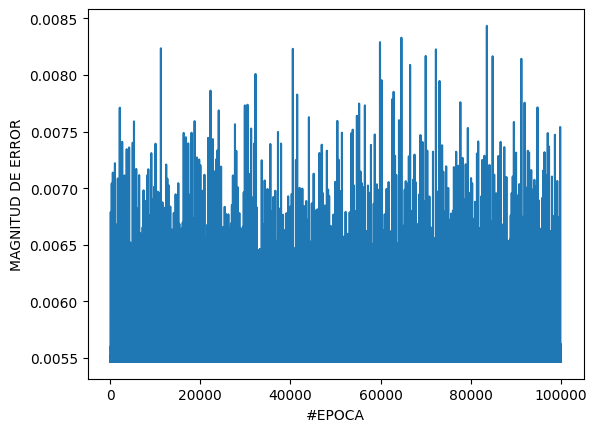

In [60]:
plt.xlabel("#EPOCA")
plt.ylabel("MAGNITUD DE ERROR")
plt.plot(historial.history["loss"])

In [61]:
from string import  printable

# Imprimir el error final (último valor de "loss")
error_final = historial.history["loss"][-1]
print(f"Error final: {error_final:.4f}")

print("Conversión")
resultado= modelo.predict([-41])
print("El resultado es: "+ str(resultado)+ " Fhrenheit")

Error final: 0.0055
Conversión
1/1 [==============================] - 0s 66ms/step
El resultado es: [[-41.953674]] Fhrenheit


In [63]:
print("variables del modelo: ")
print(capa.get_weights())

variables del modelo: 
[array([[1.8025906]], dtype=float32), array([31.952538], dtype=float32)]
